# Project
This project aims to predict the prices of second hand cars in the market, using supervised learning ML Models, to help potential customers be better prepared in their search for a second hand car, by having a better understanding/estimation of the price. Here are the steps we will follow to achieve this:
- Get the data
- Clean the data
- Perform EDA
- Train Model(s)
- Evaluate the model(s) using various metrics (R2, MSE, MAE, RMSE).

## Data
Used car price Dataset. (2023, December 27). Kaggle. https://www.kaggle.com/datasets/rishabhkarn/used-car-dataset/data

🚗 Used Car Price Dataset: A dataset for predicting used car price 📊

Dive into the world of used cars with our dataset, perfect for predicting prices. It's a carefully selected set of data that car enthusiasts, analysts, and data scientists will find valuable. Whether you're curious or looking to analyze, this dataset is your guide to understanding the dynamics of how used cars are valued.

Key Features:

🛣️ Rich Attributes: Explore a number of attributes, including mileage, model year, fuel type, transmission, and more, providing a 360-degree view of each vehicle's specifications.
📉 Depreciation Insights: Uncover patterns in vehicle depreciation over time and across different makes and models, empowering you to make informed predictions about future price trends.
📱 Technological Integration: Seamlessly integrate our dataset into your predictive modeling pipelines, harnessing the power of technology to foresee changes in the used car market.

### Dataset Description:

1552 Rows, 15 Columns

#### Attributes:

- car_name
- registration_year
- insurance_validity
- fuel_type
- seats
- kms_driven
- ownership
- transmission
- manufacturing_year
- mileage(kmpl)
- engine(cc)
- max_power(bhp)
- torque(Nm)
- price(in lakhs)

## Models
In this project, we are going to be using 2 Models, Linear Regression and AdaBoost Regressor. We chose these models for the following reasons
- Diversity in Approaches: By choosing both Linear Regression and AdaBoost Regressor, we leverage the strengths of both linear models and ensemble methods. This diversity allows us to compare and understand the impact of linearity and non-linearity in the data.
- Model Comparison and Validation: Using both models provides a comprehensive understanding of the dataset. It allows us to validate whether a simple linear model suffices or if a more complex ensemble approach yields better results, considering the trade-offs.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.feature_selection import RFECV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

## Load the data

In [2]:
df = pd.read_csv('./Used Car Dataset.csv',index_col=0)
df.head()

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
0,2017 Mercedes-Benz S-Class S400,Jul-17,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Jan-21,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99
2,2018 BMW X1 sDrive 20d xLine,Sep-18,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75
3,2019 Kia Seltos GTX Plus,Dec-19,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56
4,2019 Skoda Superb LK 1.8 TSI AT,Aug-19,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1553 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1553 non-null   object 
 1   registration_year   1553 non-null   object 
 2   insurance_validity  1553 non-null   object 
 3   fuel_type           1553 non-null   object 
 4   seats               1553 non-null   int64  
 5   kms_driven          1553 non-null   int64  
 6   ownsership          1553 non-null   object 
 7   transmission        1553 non-null   object 
 8   manufacturing_year  1553 non-null   object 
 9   mileage(kmpl)       1550 non-null   float64
 10  engine(cc)          1550 non-null   float64
 11  max_power(bhp)      1550 non-null   float64
 12  torque(Nm)          1549 non-null   float64
 13  price(in lakhs)     1553 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 182.0+ KB


## EDA & Cleaning

First we check if there are any NaN Values

In [4]:
df.isna().sum()

car_name              0
registration_year     0
insurance_validity    0
fuel_type             0
seats                 0
kms_driven            0
ownsership            0
transmission          0
manufacturing_year    0
mileage(kmpl)         3
engine(cc)            3
max_power(bhp)        3
torque(Nm)            4
price(in lakhs)       0
dtype: int64

In [5]:
df[df[['mileage(kmpl)','engine(cc)','max_power(bhp)','torque(Nm)']].isna().any(axis=1)]

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
462,2022 BMW X3 xDrive30i M Sport,Feb-22,Zero Dep,Petrol,5,8450,First Owner,Automatic,2022,19.0,5.0,5.0,NaN,71.90
513,2011 Toyota Etios G,Dec-11,Comprehensive,Petrol,5,51710,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.48
533,2011 Toyota Etios G,Dec-11,Comprehensive,Petrol,5,51710,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.48
589,2011 Toyota Etios G,Jul-11,Comprehensive,Petrol,5,54214,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.55


In [6]:
df[df['car_name'] == '2011 Toyota Etios G']

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
513,2011 Toyota Etios G,Dec-11,Comprehensive,Petrol,5,51710,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.48
533,2011 Toyota Etios G,Dec-11,Comprehensive,Petrol,5,51710,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.48
589,2011 Toyota Etios G,Jul-11,Comprehensive,Petrol,5,54214,First Owner,Manual,2011,NaN,NaN,NaN,NaN,2.55


In [7]:
df[df['car_name'] == '2022 BMW X3 xDrive30i M Sport']

,car_name,registration_year,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
462,2022 BMW X3 xDrive30i M Sport,Feb-22,Zero Dep,Petrol,5,8450,First Owner,Automatic,2022,19.0,5.0,5.0,NaN,71.9


Since all the NaN values are just in these 3 rows, and these 2 cars do not have any other rows, we will be removing them from data.

In [8]:
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1549 entries, 0 to 1552
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1549 non-null   object 
 1   registration_year   1549 non-null   object 
 2   insurance_validity  1549 non-null   object 
 3   fuel_type           1549 non-null   object 
 4   seats               1549 non-null   int64  
 5   kms_driven          1549 non-null   int64  
 6   ownsership          1549 non-null   object 
 7   transmission        1549 non-null   object 
 8   manufacturing_year  1549 non-null   object 
 9   mileage(kmpl)       1549 non-null   float64
 10  engine(cc)          1549 non-null   float64
 11  max_power(bhp)      1549 non-null   float64
 12  torque(Nm)          1549 non-null   float64
 13  price(in lakhs)     1549 non-null   float64
dtypes: float64(5), int64(2), object(7)
memory usage: 181.5+ KB


We are dropping the registration_year col, as it is pretty similar to the manufacturing_year col

In [9]:
df = df.drop('registration_year',axis=1)

We check for duplicate data

In [10]:
df.duplicated().sum()

420

In [11]:
df.loc[df.duplicated]

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
40,2021 MG Gloster Savvy 6-Str,Comprehensive,Diesel,6,35000,First Owner,Automatic,2021,12.40,1996.0,1996.0,21501.0,35.00
41,2010 Maruti Swift 1.2 VXi BSII,Comprehensive,Petrol,5,100525,First Owner,Manual,2010,16.10,1197.0,1197.0,85.0,2.09
42,2015 Honda City i VTEC CVT VX,Third Party insurance,Petrol,5,83000,Second Owner,Automatic,2015,18.00,1497.0,1497.0,1173.0,6.25
43,2011 Maruti Wagon R LXI BSIII,Comprehensive,Petrol,5,40191,Second Owner,Manual,2011,998.00,671.0,671.0,90.0,2.12
44,2015 Audi A6 35 TDI,Comprehensive,Diesel,5,62152,First Owner,Automatic,2015,18.53,1968.0,1968.0,18774.0,20.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1503,2013 Hyundai i10 Sportz,Comprehensive,Petrol,5,1800,First Owner,Manual,2013,20.36,1197.0,1197.0,789.0,3.15
1510,2019 Jeep Compass 1.4 Limited Plus BSIV,Comprehensive,Petrol,5,34000,First Owner,Automatic,2019,16.00,1368.0,1368.0,16077.0,17.50
1511,2021 Toyota Urban cruiser Premium AT,Zero Dep,Petrol,5,30000,First Owner,Automatic,2021,18.76,1462.0,1462.0,10326.0,11.40
1512,2018 Hyundai Grand i10 Sportz,Comprehensive,Petrol,5,22700,First Owner,Manual,2018,18.90,1197.0,1197.0,8186.0,5.45


We delete the duplicate data

In [12]:
df = df.drop_duplicates()
df.duplicated().sum()

0

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1129 entries, 0 to 1552
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1129 non-null   object 
 1   insurance_validity  1129 non-null   object 
 2   fuel_type           1129 non-null   object 
 3   seats               1129 non-null   int64  
 4   kms_driven          1129 non-null   int64  
 5   ownsership          1129 non-null   object 
 6   transmission        1129 non-null   object 
 7   manufacturing_year  1129 non-null   object 
 8   mileage(kmpl)       1129 non-null   float64
 9   engine(cc)          1129 non-null   float64
 10  max_power(bhp)      1129 non-null   float64
 11  torque(Nm)          1129 non-null   float64
 12  price(in lakhs)     1129 non-null   float64
dtypes: float64(5), int64(2), object(6)
memory usage: 123.5+ KB


Splitting the car_name col into car_model and car_maker cols, for further analysis 

In [14]:
df['car_model'] = df['car_name'].str.split().str[2:].str.join(' ')
df['car_maker'] = df['car_name'].str.split().str[1:2].str.join(' ')
df

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),car_model,car_maker
0,2017 Mercedes-Benz S-Class S400,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,S-Class S400,Mercedes-Benz
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,Magnite Turbo CVT XV Premium Opt BSVI,Nissan
2,2018 BMW X1 sDrive 20d xLine,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,X1 sDrive 20d xLine,BMW
3,2019 Kia Seltos GTX Plus,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,Seltos GTX Plus,Kia
4,2019 Skoda Superb LK 1.8 TSI AT,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,Superb LK 1.8 TSI AT,Skoda
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1548,2020 Hyundai Creta SX Opt Diesel AT BSVI,Comprehensive,Diesel,5,35000,First Owner,Automatic,2020,1493.00,11345.0,11345.0,250.0,17.41,Creta SX Opt Diesel AT BSVI,Hyundai
1549,2022 Renault KWID 1.0 RXL Opt BSVI,Third Party insurance,Petrol,5,10000,999 cc,2022,Power Steering,999.00,6706.0,6706.0,91.0,3.98,KWID 1.0 RXL Opt BSVI,Renault
1550,2017 Honda WR-V i-VTEC S,Comprehensive,Petrol,5,49000,First Owner,Manual,2017,17.50,1199.0,1199.0,887.0,5.85,WR-V i-VTEC S,Honda
1551,2018 Volkswagen Polo 1.0 MPI Comfortline,Comprehensive,Petrol,5,40000,Second Owner,Manual,2018,18.78,999.0,999.0,75.0,4.75,Polo 1.0 MPI Comfortline,Volkswagen


In [15]:
df.describe()

,seats,kms_driven,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
count,1129.000000,1129.000000,1129.000000,1.129000e+03,1.129000e+03,1.129000e+03,1129.000000
mean,64.533215,53175.497786,221.419362,1.154669e+10,1.154669e+10,1.443523e+04,159.872019
std,1993.857832,43141.973771,557.662692,1.937050e+11,1.937050e+11,9.555439e+04,3509.950855
min,4.000000,620.000000,7.810000,1.700000e+01,1.700000e+01,5.000000e+00,1.000000
25%,5.000000,30000.000000,16.550000,1.197000e+03,1.197000e+03,4.300000e+02,4.500000
50%,5.000000,49000.000000,18.900000,1.461000e+03,1.461000e+03,1.176000e+03,6.750000
75%,5.000000,70000.000000,22.350000,1.991000e+03,1.991000e+03,8.850000e+03,14.900000
max,67000.000000,810000.000000,3996.000000,3.258640e+12,3.258640e+12,1.464800e+06,95000.000000


In [16]:
df.describe(include='object')

,car_name,insurance_validity,fuel_type,ownsership,transmission,manufacturing_year,car_model,car_maker
count,1129,1129,1129,1129,1129,1129,1129,1129
unique,923,6,4,22,13,19,692,28
top,2015 Hyundai Grand i10 Magna,Comprehensive,Petrol,First Owner,Manual,2018,Grand i10 Magna,Maruti
freq,8,787,748,918,644,172,15,254


In [17]:
# check the top 10 of 'car_maker':

brand_counts = pd.DataFrame(df['car_maker'].value_counts())
brand_counts.head(10)

,count
car_maker,
Maruti,254
Hyundai,240
Honda,130
Mercedes-Benz,97
BMW,60
Toyota,46
Audi,40
Tata,38
Mahindra,33


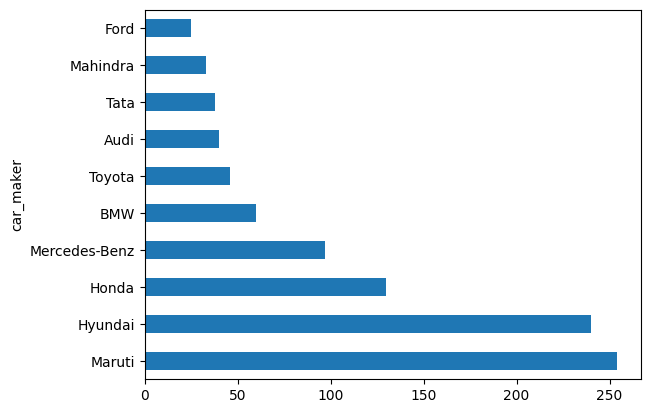

In [18]:
# chck the values of 'car_maker' column:

df['car_maker'].value_counts().head(10).plot(kind='barh')
plt.show()

We will now map each of the car companies to their respective countries. This will provide some additional insights into the data.

In [19]:
brand_country_map = {
    'Maruti': 'India',
    'Hyundai': 'South Korea',
    'Honda': 'Japan',
    'Mercedes-Benz': 'Germany',
    'Toyota': 'Japan',
    'BMW': 'Germany',
    'Tata': 'India',
    'Audi': 'Germany',
    'Mahindra': 'India',
    'Ford': 'United States',
    'Renault': 'France',
    'Volkswagen': 'Germany',
    'Kia': 'South Korea',
    'Nissan': 'Japan',
    'Skoda': 'Czech Republic',
    'Jeep': 'United States',
    'MG': 'United Kingdom',
    'Volvo': 'Sweden',
    'Jaguar': 'United Kingdom',
    'Land': 'United Kingdom',
    'Datsun': 'Japan',
    'Mitsubishi': 'Japan',
    'Porsche': 'Germany',
    'Mini': 'United Kingdom',
    'Isuzu': 'Japan',
    'Lexus': 'Japan',
    'Fiat': 'Italy',
    'Lamborghini': 'Italy'
}
df['origin_country'] = df['car_maker'].map(brand_country_map)
df.head()

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),car_model,car_maker,origin_country
0,2017 Mercedes-Benz S-Class S400,Comprehensive,Petrol,5,56000,First Owner,Automatic,2017,7.81,2996.0,2996.0,333.0,63.75,S-Class S400,Mercedes-Benz,Germany
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Comprehensive,Petrol,5,30615,First Owner,Automatic,2020,17.40,999.0,999.0,9863.0,8.99,Magnite Turbo CVT XV Premium Opt BSVI,Nissan,Japan
2,2018 BMW X1 sDrive 20d xLine,Comprehensive,Diesel,5,24000,First Owner,Automatic,2018,20.68,1995.0,1995.0,188.0,23.75,X1 sDrive 20d xLine,BMW,Germany
3,2019 Kia Seltos GTX Plus,Comprehensive,Petrol,5,18378,First Owner,Manual,2019,16.50,1353.0,1353.0,13808.0,13.56,Seltos GTX Plus,Kia,South Korea
4,2019 Skoda Superb LK 1.8 TSI AT,Comprehensive,Petrol,5,44900,First Owner,Automatic,2019,14.67,1798.0,1798.0,17746.0,24.00,Superb LK 1.8 TSI AT,Skoda,Czech Republic


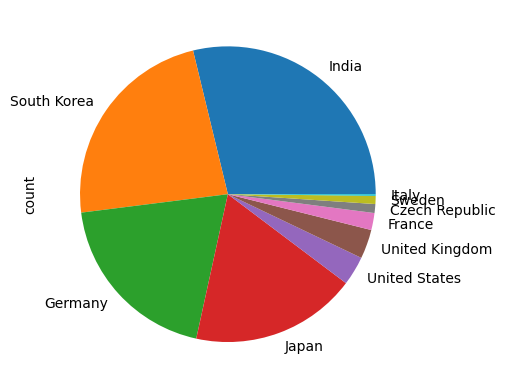

<Figure size 1500x500 with 0 Axes>

In [20]:
# Visualize the origin_country:

df['origin_country'].value_counts().plot(kind='pie')
plt.figure(figsize=(15,5))
plt.show()

In [21]:
pd.DataFrame(df['origin_country'].value_counts())

,count
origin_country,
India,325
South Korea,262
Germany,221
Japan,205
United States,36
United Kingdom,36
France,21
Czech Republic,11
Sweden,10


insurance_validity
Comprehensive            787
Third Party insurance    233
Third Party               56
Zero Dep                  51
Petrol                     1
Not Available              1
Name: count, dtype: int64


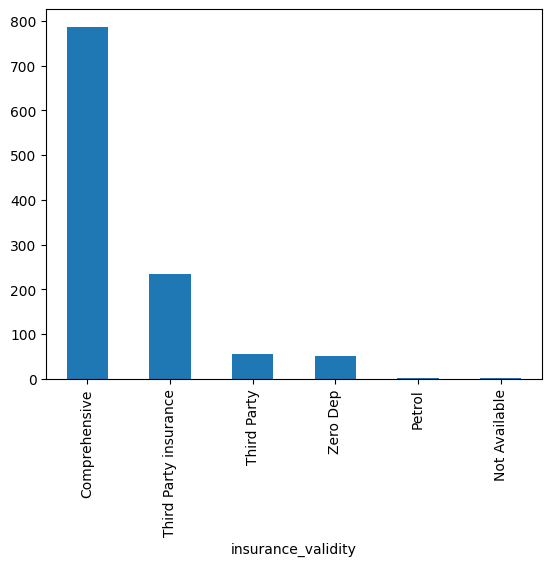

In [22]:
# check the values of 'insurance_validity' column:

df['insurance_validity'].value_counts().plot(kind='bar')
print(df['insurance_validity'].value_counts())
plt.show()

In the insurance_validity col, we replace 'Third Party' values to 'Third Party insurance', as these should be the same

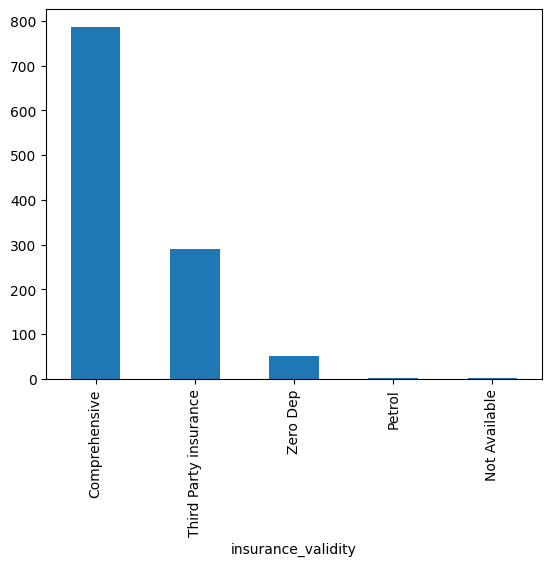

In [23]:
df['insurance_validity'] = df['insurance_validity'].replace('Third Party','Third Party insurance')

df['insurance_validity'].value_counts().plot(kind='bar')
plt.show()

In [24]:
df[df['insurance_validity']==('Not Available')]

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),car_model,car_maker,origin_country
946,2009 Mercedes-Benz S-Class S 350 L,Not Available,Petrol,5,92762,Fifth Owner,Automatic,2009,10.13,3498.0,3498.0,3649.0,8.25,S-Class S 350 L,Mercedes-Benz,Germany


In [25]:
df[df['insurance_validity']==('Petrol')]

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),car_model,car_maker,origin_country
798,2013 Mercedes-Benz E-Class E 200 CGI Avantgarde,Petrol,5 Seats,67000,1796,2013,Power Windows Front,Air Conditioner,285.0,17.0,17.0,5.0,16.5,E-Class E 200 CGI Avantgarde,Mercedes-Benz,Germany


Deleting this row, as this has wrong values for many of the features

In [26]:
df = df.drop(df[df['insurance_validity'] == 'Petrol'].index)
df['insurance_validity'].value_counts()

insurance_validity
Comprehensive            787
Third Party insurance    289
Zero Dep                  51
Not Available              1
Name: count, dtype: int64

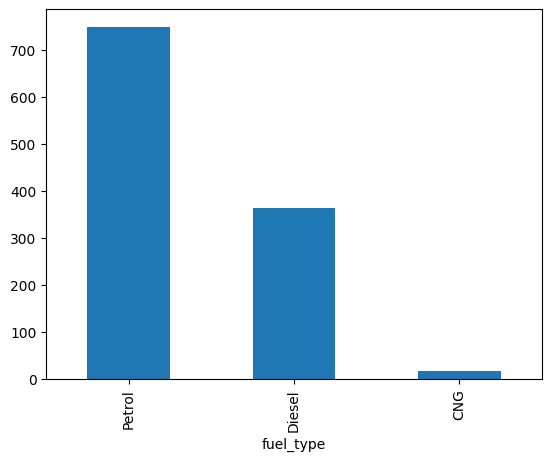

In [27]:
# check the values of 'fuel_type' column:

df['fuel_type'].value_counts().plot(kind='bar')
plt.show()

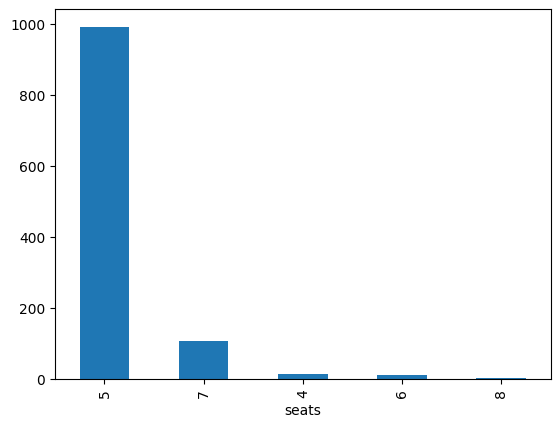

In [28]:
# check the values of 'seats' column:

df['seats'].value_counts().plot(kind='bar')
plt.show()

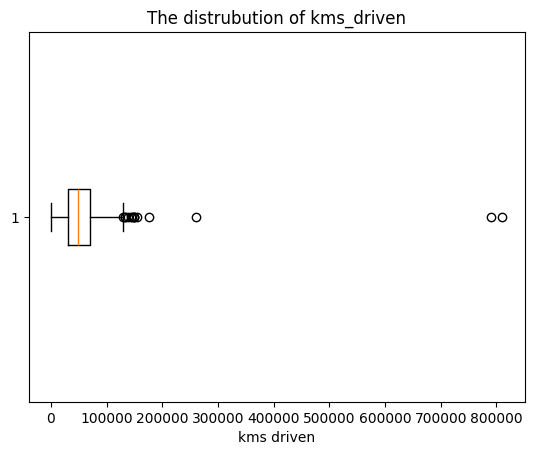

<Figure size 1500x500 with 0 Axes>

In [29]:
# visualize the distrubution of 'kms_driven' column:

plt.boxplot(df['kms_driven'],vert=False)
plt.title('The distrubution of kms_driven')
plt.xlabel('kms driven')
plt.figure(figsize=(15,5))
plt.show()

In [30]:
df[df['kms_driven'] > 200000]

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),car_model,car_maker,origin_country
1094,2020 Hyundai Venue SX Plus Turbo DCT,Zero Dep,Petrol,5,790000,First Owner,Automatic,2020,18.15,998.0,998.0,11835.0,9.75,Venue SX Plus Turbo DCT,Hyundai,South Korea
1131,2020 Ford Ecosport 1.5 Diesel Titanium,Comprehensive,Diesel,5,810000,First Owner,Manual,2020,21.70,1498.0,1498.0,9896.0,9.00,Ecosport 1.5 Diesel Titanium,Ford,United States
1420,2012 Toyota Innova 2.5 VX 7 STR BSIV,Comprehensive,Diesel,7,260000,First Owner,Manual,2012,12.80,2494.0,2494.0,102.0,6.25,Innova 2.5 VX 7 STR BSIV,Toyota,Japan


Even though we have a couple of outliers in this col, we can keep these as these practical values in reality

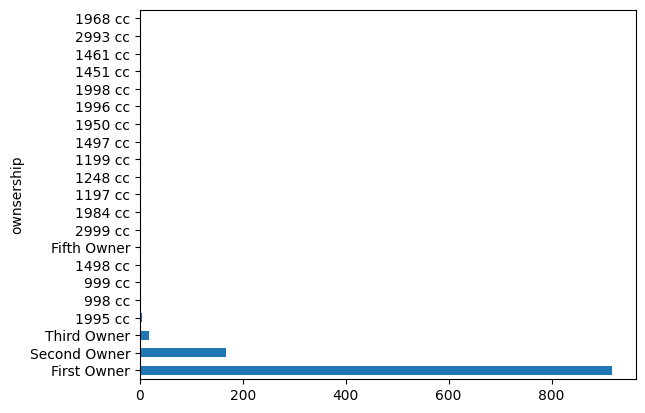

In [31]:
# check the values of 'ownsership' column:

df['ownsership'].value_counts().plot(kind='barh')
plt.show()

There are a few values that are wrong in this col

In [32]:
# filter the data that is wrong:
curpt_rows = ~df['ownsership'].isin(['First Owner', 'Second Owner', 'Third Owner', 'Fifth Owner'])
df[curpt_rows]

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),car_model,car_maker,origin_country
116,2017 BMW 7 Series 730Ld M Sport,Third Party insurance,Diesel,5,60000,2993 cc,2017,Power Steering,2993.00,26149.0,26149.0,620.0,55.00,7 Series 730Ld M Sport,BMW,Germany
170,2014 Nissan Terrano XV 110 PS Limited Edition,Third Party insurance,Diesel,5,100000,1461 cc,2014,Power Steering,1461.00,1085.0,1085.0,248.0,6.00,Terrano XV 110 PS Limited Edition,Nissan,Japan
210,2023 Hyundai i20 N-Line N8 DCT BSVI,Third Party insurance,Petrol,5,10000,998 cc,2023,Power Steering,998.00,11841.0,11841.0,172.0,11.70,i20 N-Line N8 DCT BSVI,Hyundai,South Korea
213,2017 BMW X1 sDrive20d Expedition,Third Party insurance,Diesel,5,30000,1995 cc,2017,Power Steering,1995.00,188.0,188.0,400.0,19.50,X1 sDrive20d Expedition,BMW,Germany
228,2020 MG Hector Plus Smart DCT,Third Party insurance,Petrol,6,20000,1451 cc,2020,Power Windows Front,1451.00,141.0,141.0,250.0,17.50,Hector Plus Smart DCT,MG,United Kingdom
231,2017 BMW X1 sDrive20d Expedition,Third Party insurance,Diesel,5,32000,1995 cc,2017,Power Steering,1995.00,188.0,188.0,400.0,18.20,X1 sDrive20d Expedition,BMW,Germany
269,2017 BMW X1 sDrive20d Expedition,Third Party insurance,Diesel,5,32000,1995 cc,2017,Power Steering,1995.00,188.0,188.0,400.0,19.50,X1 sDrive20d Expedition,BMW,Germany
272,2021 BMW 2 Series Black Shadow Edition,Third Party insurance,Petrol,4,40000,1998 cc,2021,Power Steering,1998.00,18740.0,18740.0,280.0,32.00,2 Series Black Shadow Edition,BMW,Germany
361,2014 Honda City i DTEC V,Third Party insurance,Diesel,5,80000,1498 cc,2014,Power Steering,1498.00,986.0,986.0,200.0,4.75,City i DTEC V,Honda,Japan
367,2011 Honda City 1.5 S MT,Third Party insurance,Petrol,5,110000,1497 cc,2011,Power Steering,1497.00,1186600.0,1186600.0,1464800.0,3.50,City 1.5 S MT,Honda,Japan


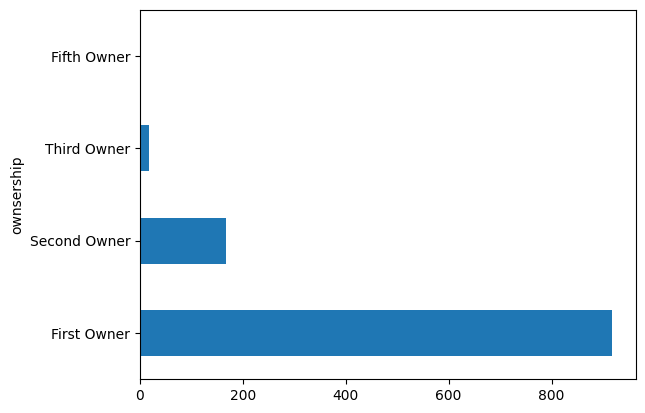

In [33]:
# drop the curpt rows:

df = df.drop(df[curpt_rows].index)
df['ownsership'].value_counts().plot(kind='barh')
plt.show()

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1104 entries, 0 to 1552
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1104 non-null   object 
 1   insurance_validity  1104 non-null   object 
 2   fuel_type           1104 non-null   object 
 3   seats               1104 non-null   int64  
 4   kms_driven          1104 non-null   int64  
 5   ownsership          1104 non-null   object 
 6   transmission        1104 non-null   object 
 7   manufacturing_year  1104 non-null   object 
 8   mileage(kmpl)       1104 non-null   float64
 9   engine(cc)          1104 non-null   float64
 10  max_power(bhp)      1104 non-null   float64
 11  torque(Nm)          1104 non-null   float64
 12  price(in lakhs)     1104 non-null   float64
 13  car_model           1104 non-null   object 
 14  car_maker           1104 non-null   object 
 15  origin_country      1104 non-null   object 
dtypes: float64(

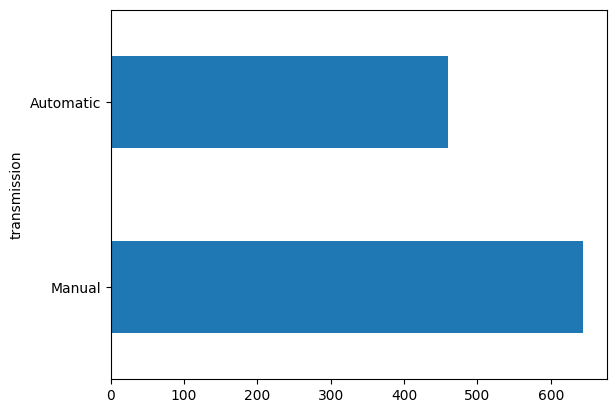

In [35]:
# check the 'transmission' column:

df['transmission'].value_counts().plot(kind='barh')
plt.show()

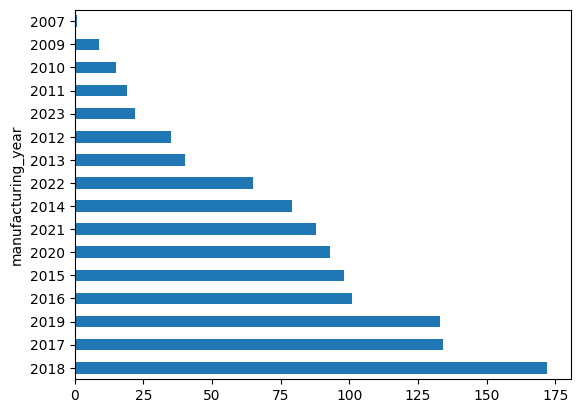

In [36]:
# check the 'manufacturing_year' column:

df['manufacturing_year'] = df['manufacturing_year'].astype('int64')

df['manufacturing_year'].value_counts().plot(kind='barh')
plt.show()

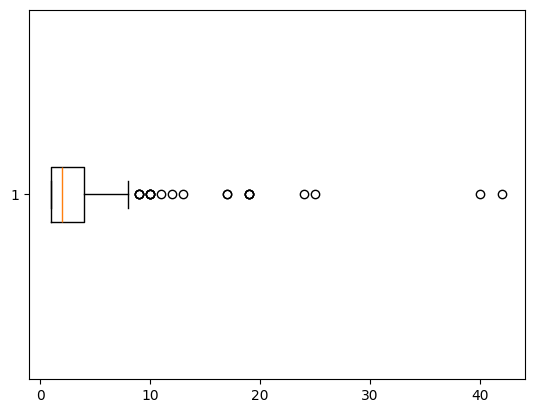

In [37]:
# check the 'mileage(kmpl)' column:

counts = df['mileage(kmpl)'].value_counts()

plt.boxplot(counts,vert=False)
plt.show()

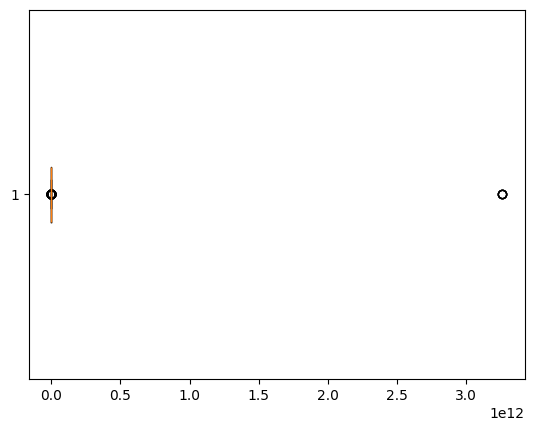

In [38]:
# check the 'engine(cc)' column:

counts = df['engine(cc)']

plt.boxplot(counts,vert=False)
plt.show()

For our purposes, which is second hand car market, cars with cc > 8400 can be considered outliers. Looking at the data below, none of these cars will have the engine cc as given, so these are clearly wrong

In [39]:
curpt_rows2 = df['engine(cc)'] > 8400

df[curpt_rows2]

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),car_model,car_maker,origin_country
79,2018 Mahindra XUV500 W5,Third Party insurance,Diesel,7,62000,Second Owner,Manual,2018,2179.0,1.528700e+04,1.528700e+04,360.0,8.50,XUV500 W5,Mahindra,India
142,2020 Mercedes-Benz GLE 300d BSVI,Zero Dep,Diesel,5,33000,First Owner,Automatic,2020,1950.0,2.413800e+04,2.413800e+04,500.0,78.00,GLE 300d BSVI,Mercedes-Benz,Germany
145,2022 Mercedes-Benz GLE 300d BSVI,Zero Dep,Diesel,5,43703,First Owner,Automatic,2022,1950.0,2.413800e+04,2.413800e+04,500.0,82.90,GLE 300d BSVI,Mercedes-Benz,Germany
146,2021 Toyota Fortuner Legender 4x2 AT,Comprehensive,Diesel,7,29800,First Owner,Automatic,2021,2755.0,2.011500e+04,2.011500e+04,500.0,44.00,Fortuner Legender 4x2 AT,Toyota,Japan
160,2019 Mercedes-Benz AMG C43 4MATIC Coupe,Comprehensive,Petrol,5,30000,First Owner,Automatic,2019,2996.0,3.848700e+04,3.848700e+04,520.0,67.00,AMG C43 4MATIC Coupe,Mercedes-Benz,Germany
162,2021 Mahindra XUV700 AX7 AT Luxury Pack BSVI,Comprehensive,Petrol,7,25000,First Owner,Automatic,2021,1999.0,1.971300e+04,1.971300e+04,380.0,24.75,XUV700 AX7 AT Luxury Pack BSVI,Mahindra,India
175,2022 Volvo XC40 T4 R-Design,Zero Dep,Petrol,5,16433,First Owner,Automatic,2022,1969.0,1.874000e+04,1.874000e+04,300.0,43.75,XC40 T4 R-Design,Volvo,Sweden
276,2020 Kia Sonet GTX Plus Diesel BSVI,Zero Dep,Diesel,5,40000,First Owner,Manual,2020,1493.0,9.863000e+03,9.863000e+03,240.0,11.55,Sonet GTX Plus Diesel BSVI,Kia,South Korea
313,2021 Audi Q2 Premium Plus I,Comprehensive,Petrol,5,28000,First Owner,Automatic,2021,1984.0,1.877400e+04,1.877400e+04,320.0,26.50,Q2 Premium Plus I,Audi,Germany
396,2022 Mercedes-Benz AMG GLC 43 4MATIC Coupe,Comprehensive,Petrol,5,16000,First Owner,Automatic,2022,2996.0,3.848700e+04,3.848700e+04,520.0,83.00,AMG GLC 43 4MATIC Coupe,Mercedes-Benz,Germany


Deleting corrupted rows

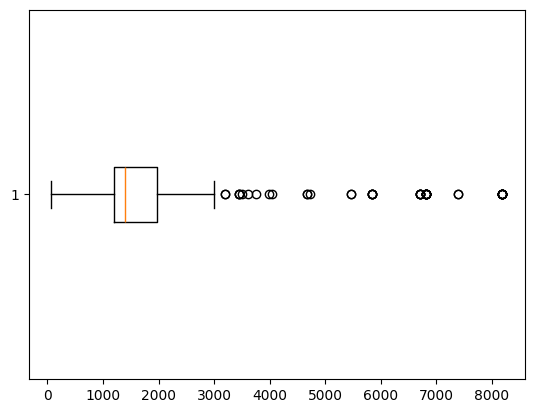

In [40]:
df = df.drop(df[curpt_rows2].index)

counts = df['engine(cc)']

plt.boxplot(counts,vert=False)
plt.show()

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1066 entries, 0 to 1552
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1066 non-null   object 
 1   insurance_validity  1066 non-null   object 
 2   fuel_type           1066 non-null   object 
 3   seats               1066 non-null   int64  
 4   kms_driven          1066 non-null   int64  
 5   ownsership          1066 non-null   object 
 6   transmission        1066 non-null   object 
 7   manufacturing_year  1066 non-null   int64  
 8   mileage(kmpl)       1066 non-null   float64
 9   engine(cc)          1066 non-null   float64
 10  max_power(bhp)      1066 non-null   float64
 11  torque(Nm)          1066 non-null   float64
 12  price(in lakhs)     1066 non-null   float64
 13  car_model           1066 non-null   object 
 14  car_maker           1066 non-null   object 
 15  origin_country      1066 non-null   object 
dtypes: float64(

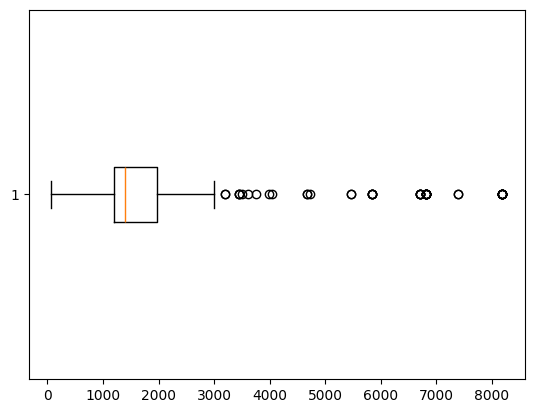

In [42]:
# check the 'max_power(bhp)' values:

counts = df['max_power(bhp)']

plt.boxplot(counts,vert=False)
plt.show()

Same reasoning as the engine(cc) above

In [43]:
# drop the data that have more than 3000 horsepower:

df = df.drop(df.index[df['max_power(bhp)'] >= 3000])
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1019 entries, 0 to 1552
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            1019 non-null   object 
 1   insurance_validity  1019 non-null   object 
 2   fuel_type           1019 non-null   object 
 3   seats               1019 non-null   int64  
 4   kms_driven          1019 non-null   int64  
 5   ownsership          1019 non-null   object 
 6   transmission        1019 non-null   object 
 7   manufacturing_year  1019 non-null   int64  
 8   mileage(kmpl)       1019 non-null   float64
 9   engine(cc)          1019 non-null   float64
 10  max_power(bhp)      1019 non-null   float64
 11  torque(Nm)          1019 non-null   float64
 12  price(in lakhs)     1019 non-null   float64
 13  car_model           1019 non-null   object 
 14  car_maker           1019 non-null   object 
 15  origin_country      1019 non-null   object 
dtypes: float64(

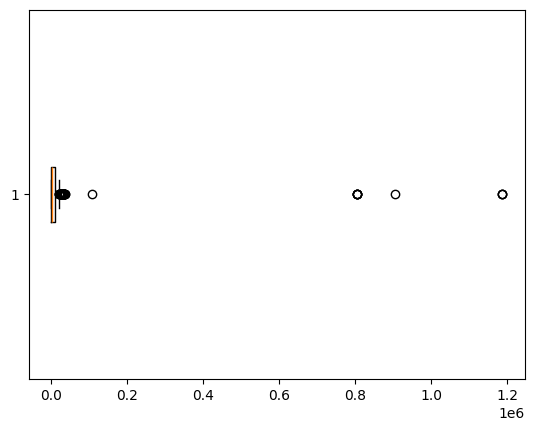

In [44]:
# check the 'torque(Nm)' values:

counts = df['torque(Nm)']

plt.boxplot(counts,vert=False)
plt.show()

In [45]:
# Check the data for the cars that have more than 20000 Nm:

curpt_rows3 = df[df['torque(Nm)'] > 20000]

curpt_rows3

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),car_model,car_maker,origin_country
8,2015 Mercedes-Benz S-Class S 350 CDI,Comprehensive,Diesel,5,68000,Second Owner,Automatic,2015,13.50,2987.0,2987.0,25479.0,42.00,S-Class S 350 CDI,Mercedes-Benz,Germany
20,2021 MG Gloster Savvy 6-Str,Comprehensive,Diesel,6,35000,First Owner,Automatic,2021,12.40,1996.0,1996.0,21501.0,35.00,Gloster Savvy 6-Str,MG,United Kingdom
64,2021 Mercedes-Benz C-Class Progressive C 200,Comprehensive,Petrol,5,25000,Second Owner,Automatic,2021,11.90,1950.0,1950.0,20115.0,40.75,C-Class Progressive C 200,Mercedes-Benz,Germany
68,2023 BMW 5 Series 530i M Sport BSVI,Zero Dep,Petrol,5,20000,First Owner,Automatic,2023,14.82,1998.0,1998.0,24808.0,65.00,5 Series 530i M Sport BSVI,BMW,Germany
198,2019 Mercedes-Benz S-Class S 350 d,Comprehensive,Diesel,5,27200,First Owner,Automatic,2019,13.50,2925.0,2925.0,28161.0,77.00,S-Class S 350 d,Mercedes-Benz,Germany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1492,2019 BMW X7 xDrive 40i M Sport,Comprehensive,Petrol,7,28000,First Owner,Automatic,2019,10.54,2998.0,2998.0,33525.0,99.00,X7 xDrive 40i M Sport,BMW,Germany
1507,2010 Honda City 1.5 V MT,Comprehensive,Petrol,5,32000,First Owner,Manual,2010,17.00,1497.0,1497.0,1186600.0,2.40,City 1.5 V MT,Honda,Japan
1509,2022 Volvo XC 90 B6 Inscription 7STR,Third Party insurance,Petrol,7,10000,First Owner,Automatic,2022,17.20,1969.0,1969.0,29589.0,85.00,XC 90 B6 Inscription 7STR,Volvo,Sweden
1528,2021 BMW X7 xDrive 40i M Sport,Zero Dep,Petrol,7,7000,First Owner,Automatic,2021,10.54,2998.0,2998.0,33525.0,1.15,X7 xDrive 40i M Sport,BMW,Germany


Getting rid of outliers

In [46]:
# drop the data that have more 20,000 Nm:

df = df.drop(curpt_rows3.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 956 entries, 0 to 1552
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            956 non-null    object 
 1   insurance_validity  956 non-null    object 
 2   fuel_type           956 non-null    object 
 3   seats               956 non-null    int64  
 4   kms_driven          956 non-null    int64  
 5   ownsership          956 non-null    object 
 6   transmission        956 non-null    object 
 7   manufacturing_year  956 non-null    int64  
 8   mileage(kmpl)       956 non-null    float64
 9   engine(cc)          956 non-null    float64
 10  max_power(bhp)      956 non-null    float64
 11  torque(Nm)          956 non-null    float64
 12  price(in lakhs)     956 non-null    float64
 13  car_model           956 non-null    object 
 14  car_maker           956 non-null    object 
 15  origin_country      956 non-null    object 
dtypes: float64(5

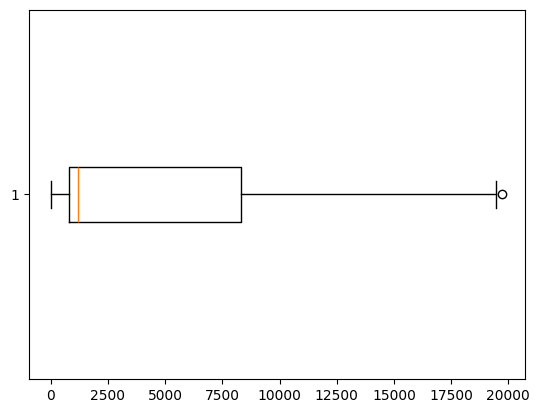

In [47]:
# visiualize the distribution of the torque column:

counts = df['torque(Nm)']

plt.boxplot(counts,vert=False)
plt.show()

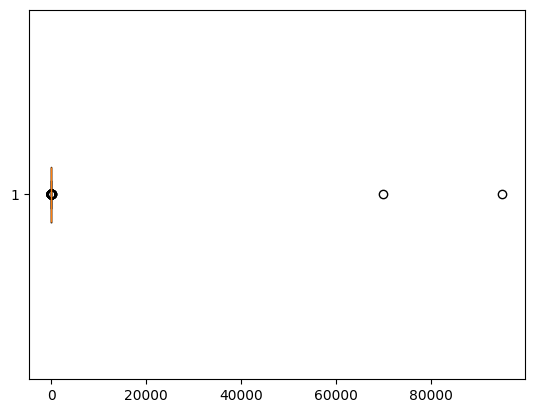

In [48]:
# check the for the price column:

counts = df['price(in lakhs)']

plt.boxplot(counts,vert=False)
plt.show()

##### The Price of cars is in Lakhs. (1 Lakh = 100,000). 1 USD = ~83 INR (Indian Rupees).
##### So, INR 100,000 = ~ USD 1200.
##### So, we will delete all values for price that are greater than 17 Lakhs (~USD 20,000)

In [49]:
curpt_rows4 = df[df['price(in lakhs)'] > 17]
curpt_rows4.count()

car_name              161
insurance_validity    161
fuel_type             161
seats                 161
kms_driven            161
ownsership            161
transmission          161
manufacturing_year    161
mileage(kmpl)         161
engine(cc)            161
max_power(bhp)        161
torque(Nm)            161
price(in lakhs)       161
car_model             161
car_maker             161
origin_country        161
dtype: int64

In [50]:
df = df.drop(curpt_rows4.index)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795 entries, 1 to 1552
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   car_name            795 non-null    object 
 1   insurance_validity  795 non-null    object 
 2   fuel_type           795 non-null    object 
 3   seats               795 non-null    int64  
 4   kms_driven          795 non-null    int64  
 5   ownsership          795 non-null    object 
 6   transmission        795 non-null    object 
 7   manufacturing_year  795 non-null    int64  
 8   mileage(kmpl)       795 non-null    float64
 9   engine(cc)          795 non-null    float64
 10  max_power(bhp)      795 non-null    float64
 11  torque(Nm)          795 non-null    float64
 12  price(in lakhs)     795 non-null    float64
 13  car_model           795 non-null    object 
 14  car_maker           795 non-null    object 
 15  origin_country      795 non-null    object 
dtypes: float64(5

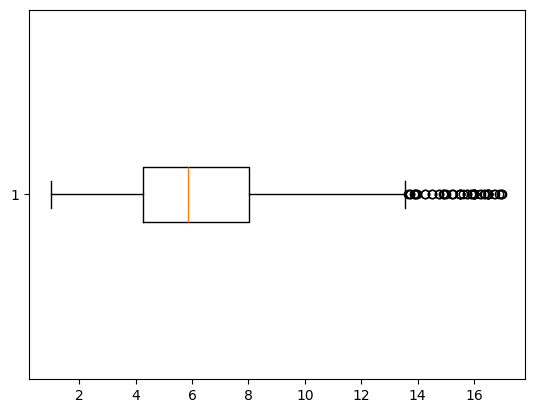

In [51]:
counts = df['price(in lakhs)']

plt.boxplot(counts,vert=False)
plt.show()

In [52]:
# manually Encode some Ordinal columns:

df['ownsership'] = df['ownsership'].replace({'First Owner' : 3, 
                                                'Second Owner': 2, 
                                                'Third Owner' : 1
                                               })

df['transmission'] = df['transmission'].replace({'Manual' : 1,
                                                   'Automatic' : 2
                                                    })

df['fuel_type'] = df['fuel_type'].replace({'Petrol' : 3,
                                                'Diesel' : 2,
                                                'CNG' : 1
                                               })

# Drop the 'car_model' and the 'car_maker' columns:

df = df.drop(['car_maker','car_model'],axis=1)

df.head(10)

/var/folders/qb/kg2dkg_s7dj4_4419z7q2fj40000gn/T/ipykernel_3110/3037028116.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['ownsership'] = df['ownsership'].replace({'First Owner' : 3,
/var/folders/qb/kg2dkg_s7dj4_4419z7q2fj40000gn/T/ipykernel_3110/3037028116.py:8: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['transmission'] = df['transmission'].replace({'Manual' : 1,
/var/folders/qb/kg2dkg_s7dj4_4419z7q2fj40000gn/T/ipykernel_3110/3037028116.py:12: FutureWarning: Downcasting behavior in `replace` is deprecated and will b

,car_name,insurance_validity,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs),origin_country
1,2020 Nissan Magnite Turbo CVT XV Premium Opt BSVI,Comprehensive,3,5,30615,3,2,2020,17.40,999.0,999.0,9863.0,8.99,Japan
3,2019 Kia Seltos GTX Plus,Comprehensive,3,5,18378,3,1,2019,16.50,1353.0,1353.0,13808.0,13.56,South Korea
5,2017 Honda Jazz 1.2 S i VTEC,Third Party insurance,3,5,42000,3,1,2017,18.70,1199.0,1199.0,887.0,5.45,Japan
6,2018 Hyundai Grand i10 1.2 Kappa Sportz BSIV,Comprehensive,3,5,36739,3,1,2018,18.90,1197.0,1197.0,8186.0,5.12,South Korea
7,2018 Hyundai Creta 1.6 SX,Comprehensive,3,5,76000,3,1,2018,15.80,1591.0,1591.0,1213.0,9.30,South Korea
9,2019 Tata Nexon 1.2 Revotron XZ Plus,Comprehensive,3,5,28783,3,1,2019,17.00,1198.0,1198.0,1085.0,8.02,India
10,2020 Honda City VX CVT,Comprehensive,3,5,40000,3,2,2020,17.40,1497.0,1497.0,1176.0,10.95,Japan
11,2021 Renault Duster RXS,Comprehensive,3,5,17382,3,1,2021,16.42,1498.0,1498.0,10455.0,8.99,France
12,2014 BMW 3 Series 320d Prestige,Third Party insurance,2,5,120000,3,2,2014,18.88,1995.0,1995.0,184.0,7.45,Germany
13,2021 Hyundai Venue SX Plus Turbo DCT,Comprehensive,3,5,17000,3,2,2021,18.15,998.0,998.0,11835.0,10.95,South Korea


We have deleted the car_name, car_maker and car_model cols, as these are no longer necessary. These were created to get the country of the company (which will be used in further analysis)

In [53]:
# seperate the numerical columns from the categorical ones:

df = df.drop('car_name',axis=1)

num_col = df.select_dtypes(include=['int64', 'float64']).columns
cat_col = df.select_dtypes(exclude=['int64', 'float64']).columns

In [54]:
df[cat_col]

,insurance_validity,origin_country
1,Comprehensive,Japan
3,Comprehensive,South Korea
5,Third Party insurance,Japan
6,Comprehensive,South Korea
7,Comprehensive,South Korea
...,...,...
1546,Comprehensive,Japan
1547,Third Party insurance,India
1550,Comprehensive,Japan
1551,Comprehensive,Germany


In [55]:
df[num_col]

,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),price(in lakhs)
1,3,5,30615,3,2,2020,17.40,999.0,999.0,9863.0,8.99
3,3,5,18378,3,1,2019,16.50,1353.0,1353.0,13808.0,13.56
5,3,5,42000,3,1,2017,18.70,1199.0,1199.0,887.0,5.45
6,3,5,36739,3,1,2018,18.90,1197.0,1197.0,8186.0,5.12
7,3,5,76000,3,1,2018,15.80,1591.0,1591.0,1213.0,9.30
...,...,...,...,...,...,...,...,...,...,...,...
1546,3,5,19446,3,2,2018,18.20,1199.0,1199.0,887.0,6.50
1547,1,7,26500,3,1,2022,26.11,1462.0,1462.0,8663.0,11.50
1550,3,5,49000,3,1,2017,17.50,1199.0,1199.0,887.0,5.85
1551,3,5,40000,2,1,2018,18.78,999.0,999.0,75.0,4.75


In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 795 entries, 1 to 1552
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   insurance_validity  795 non-null    object 
 1   fuel_type           795 non-null    int64  
 2   seats               795 non-null    int64  
 3   kms_driven          795 non-null    int64  
 4   ownsership          795 non-null    int64  
 5   transmission        795 non-null    int64  
 6   manufacturing_year  795 non-null    int64  
 7   mileage(kmpl)       795 non-null    float64
 8   engine(cc)          795 non-null    float64
 9   max_power(bhp)      795 non-null    float64
 10  torque(Nm)          795 non-null    float64
 11  price(in lakhs)     795 non-null    float64
 12  origin_country      795 non-null    object 
dtypes: float64(5), int64(6), object(2)
memory usage: 87.0+ KB


Encoding the following cols for further analysis

In [57]:
df = pd.get_dummies(df,columns=['insurance_validity','origin_country'])
df

,fuel_type,seats,kms_driven,ownsership,transmission,manufacturing_year,mileage(kmpl),engine(cc),max_power(bhp),torque(Nm),...,insurance_validity_Zero Dep,origin_country_Czech Republic,origin_country_France,origin_country_Germany,origin_country_India,origin_country_Italy,origin_country_Japan,origin_country_South Korea,origin_country_United Kingdom,origin_country_United States
1,3,5,30615,3,2,2020,17.40,999.0,999.0,9863.0,...,False,False,False,False,False,False,True,False,False,False
3,3,5,18378,3,1,2019,16.50,1353.0,1353.0,13808.0,...,False,False,False,False,False,False,False,True,False,False
5,3,5,42000,3,1,2017,18.70,1199.0,1199.0,887.0,...,False,False,False,False,False,False,True,False,False,False
6,3,5,36739,3,1,2018,18.90,1197.0,1197.0,8186.0,...,False,False,False,False,False,False,False,True,False,False
7,3,5,76000,3,1,2018,15.80,1591.0,1591.0,1213.0,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1546,3,5,19446,3,2,2018,18.20,1199.0,1199.0,887.0,...,False,False,False,False,False,False,True,False,False,False
1547,1,7,26500,3,1,2022,26.11,1462.0,1462.0,8663.0,...,False,False,False,False,True,False,False,False,False,False
1550,3,5,49000,3,1,2017,17.50,1199.0,1199.0,887.0,...,False,False,False,False,False,False,True,False,False,False
1551,3,5,40000,2,1,2018,18.78,999.0,999.0,75.0,...,False,False,False,True,False,False,False,False,False,False


## Feature Engineering

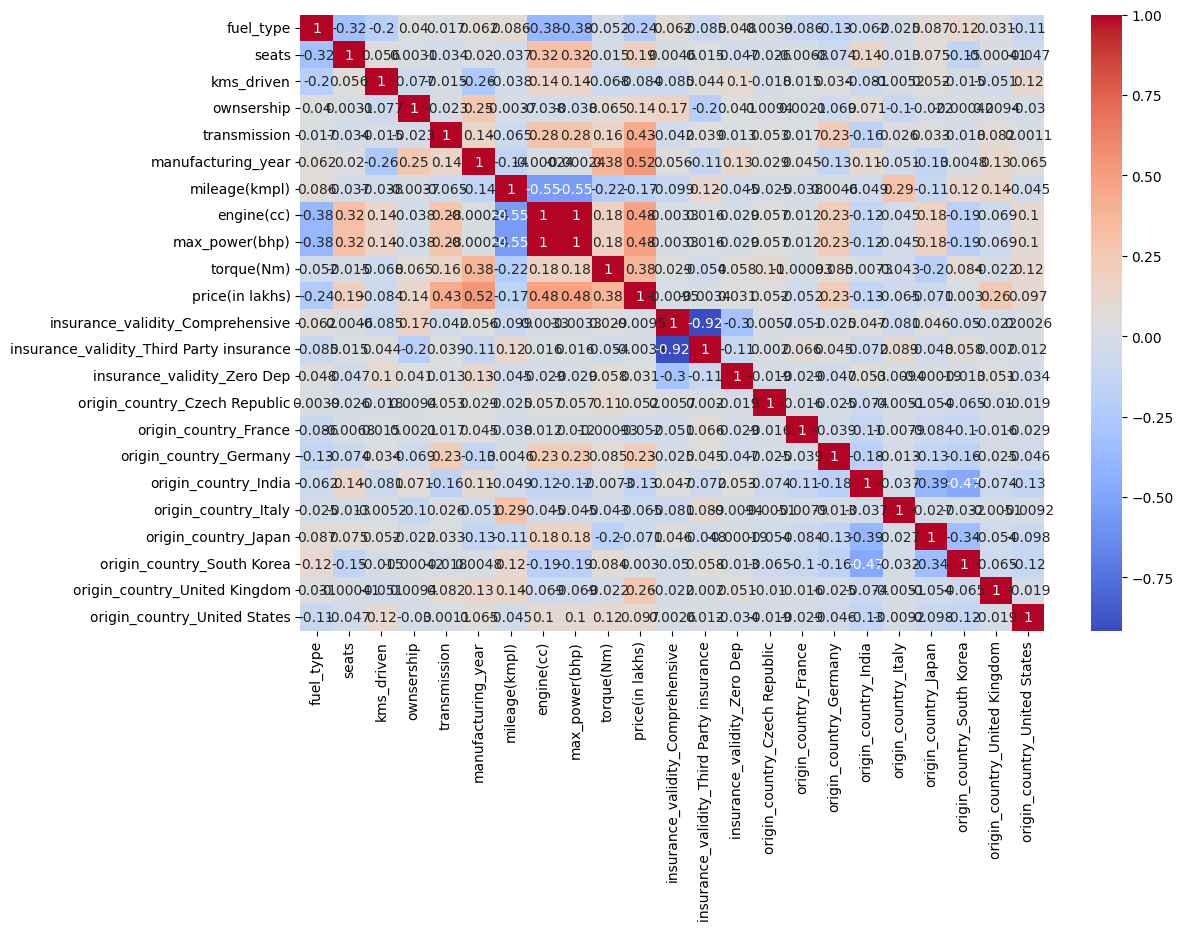

In [58]:
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

### Collinearity
As we can see in the above correlation matrix, this is a case of perfect Collinearity between max_power(bhp) and engine(cc). This makes them redundant, so we are deleting max_power(bhp)

In [59]:
df = df.drop(columns='max_power(bhp)')


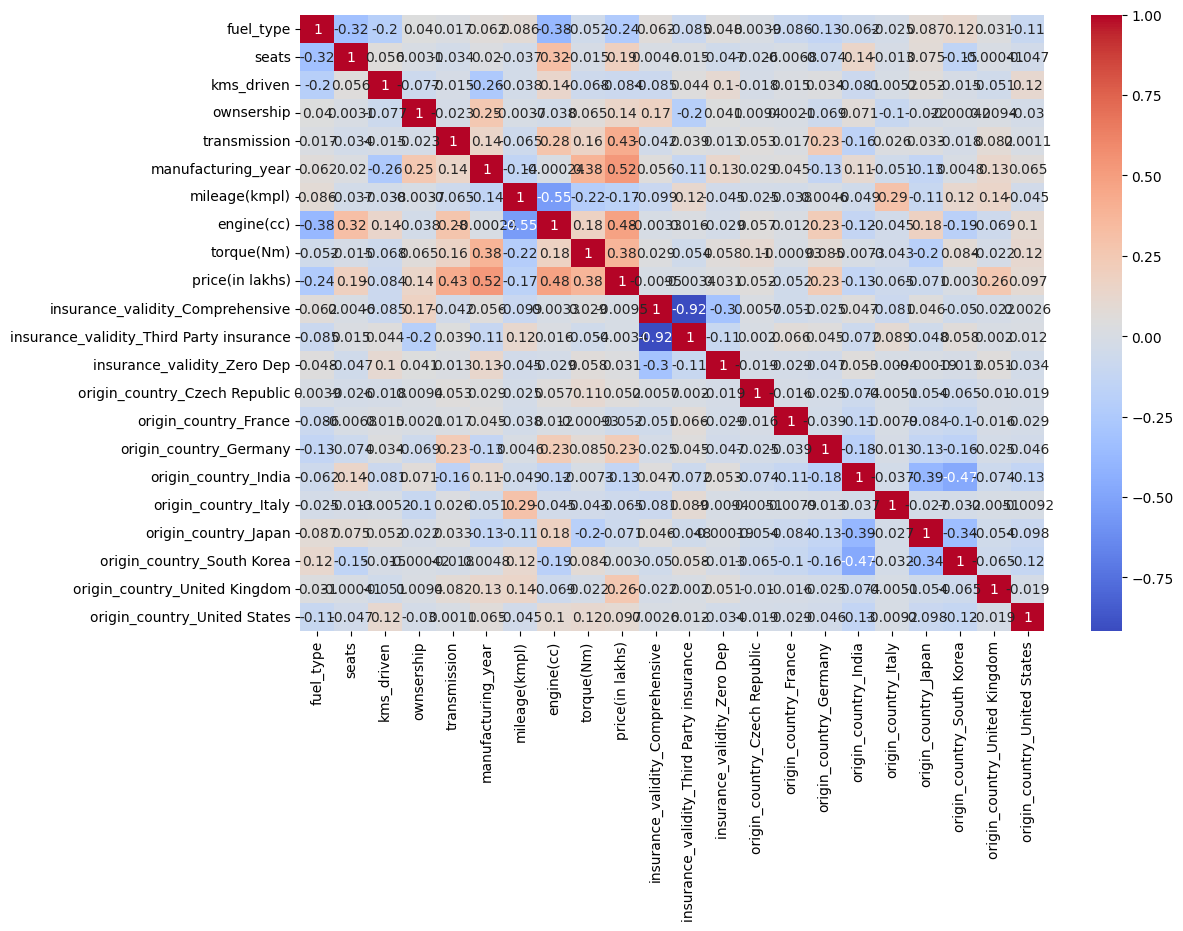

In [60]:
# Correlation matrix
corr_matrix = df.corr()

plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

In [61]:
X = df.drop('price(in lakhs)',axis=1)
Y = df['price(in lakhs)']

Splitting the data

In [62]:
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.3,random_state=0)

## Model Training
As mentioned previously, we are going to be training 2 models (Linear Regression and AdaBoost Regressor).

We will begin will getting the best features for both the models using RFECV (Recursive Feature Elimination with Cross-Validation)

In [63]:
# Define the Linear Regression model
lr_model = LinearRegression()

# Apply RFECV for Linear Regression
rfecv_lr = RFECV(estimator=lr_model, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv_lr.fit(X_train, y_train)

# Get the selected features for Linear Regression
selected_features_lr = X_train.columns[rfecv_lr.support_]
X_train_lr = rfecv_lr.transform(X_train)
X_test_lr = rfecv_lr.transform(X_test)

print(f"Selected Features for Linear Regression: {selected_features_lr}")

Selected Features for Linear Regression: Index(['fuel_type', 'seats', 'ownsership', 'transmission',
       'manufacturing_year', 'mileage(kmpl)', 'engine(cc)', 'torque(Nm)',
       'insurance_validity_Comprehensive',
       'insurance_validity_Third Party insurance',
       'insurance_validity_Zero Dep', 'origin_country_Czech Republic',
       'origin_country_France', 'origin_country_Germany',
       'origin_country_India', 'origin_country_Italy', 'origin_country_Japan',
       'origin_country_South Korea', 'origin_country_United Kingdom',
       'origin_country_United States'],
      dtype='object')


In [64]:
# Define the AdaBoost model with a base estimator
base_estimator = DecisionTreeRegressor(max_depth=1)
ada_model = AdaBoostRegressor(base_estimator, n_estimators=100, learning_rate=0.1, random_state=42)

# Apply RFECV for AdaBoost Regressor
rfecv_ada = RFECV(estimator=ada_model, step=1, cv=5, scoring='neg_mean_squared_error')
rfecv_ada.fit(X_train, y_train)

# Get the selected features for AdaBoost Regressor
selected_features_ada = X_train.columns[rfecv_ada.support_]
X_train_ada = rfecv_ada.transform(X_train)
X_test_ada = rfecv_ada.transform(X_test)

print(f"Selected Features for AdaBoost Regressor: {selected_features_ada}")

Selected Features for AdaBoost Regressor: Index(['transmission', 'manufacturing_year', 'engine(cc)', 'torque(Nm)'], dtype='object')


## Model Evaluation

In [65]:
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = mse ** 0.5
    r2 = r2_score(y_test, y_pred)
    return mae, mse, rmse, r2

# Evaluate Linear Regression
lr_model.fit(X_train_lr, y_train)
y_pred_lr = lr_model.predict(X_test_lr)
mae_lr, mse_lr, rmse_lr, r2_lr = evaluate_model(y_test, y_pred_lr)

# Evaluate Best AdaBoost Regressor
ada_model.fit(X_train_ada, y_train)
y_pred_ada = ada_model.predict(X_test_ada)
mae_ada, mse_ada, rmse_ada, r2_ada = evaluate_model(y_test, y_pred_ada)

# Print Evaluation Metrics
print(f"Linear Regression - MAE: {mae_lr}, MSE: {mse_lr}, RMSE: {rmse_lr}, R2: {r2_lr}")
print(f"Best AdaBoost Regressor - MAE: {mae_ada}, MSE: {mse_ada}, RMSE: {rmse_ada}, R2: {r2_ada}")


Linear Regression - MAE: 1.3623316792585578, MSE: 3.5781607413714824, RMSE: 1.8916026912043349, R2: 0.7082418124588912
Best AdaBoost Regressor - MAE: 1.9931586398419514, MSE: 6.682123229039241, RMSE: 2.5849803150196795, R2: 0.45514908268666066


#### Interpretation
Mean Absolute Error (MAE):
Linear Regression has a lower MAE (1.362) compared to AdaBoost (1.993), indicating that, on average, the predictions of the Linear Regression model are closer to the actual values than those of the AdaBoost Regressor.

Mean Squared Error (MSE) and Root Mean Squared Error (RMSE):
Linear Regression also has lower MSE (3.578) and RMSE (1.892) compared to AdaBoost (MSE: 6.682, RMSE: 2.585). This further suggests that Linear Regression provides more accurate predictions with fewer large errors.

R2:
The R2 value for Linear Regression (0.708) is significantly higher than that of AdaBoost (0.455). This indicates that Linear Regression explains about 70.8% of the variance in the car prices, while AdaBoost explains only about 45.5%. Higher R2 means that the model fits the data better.

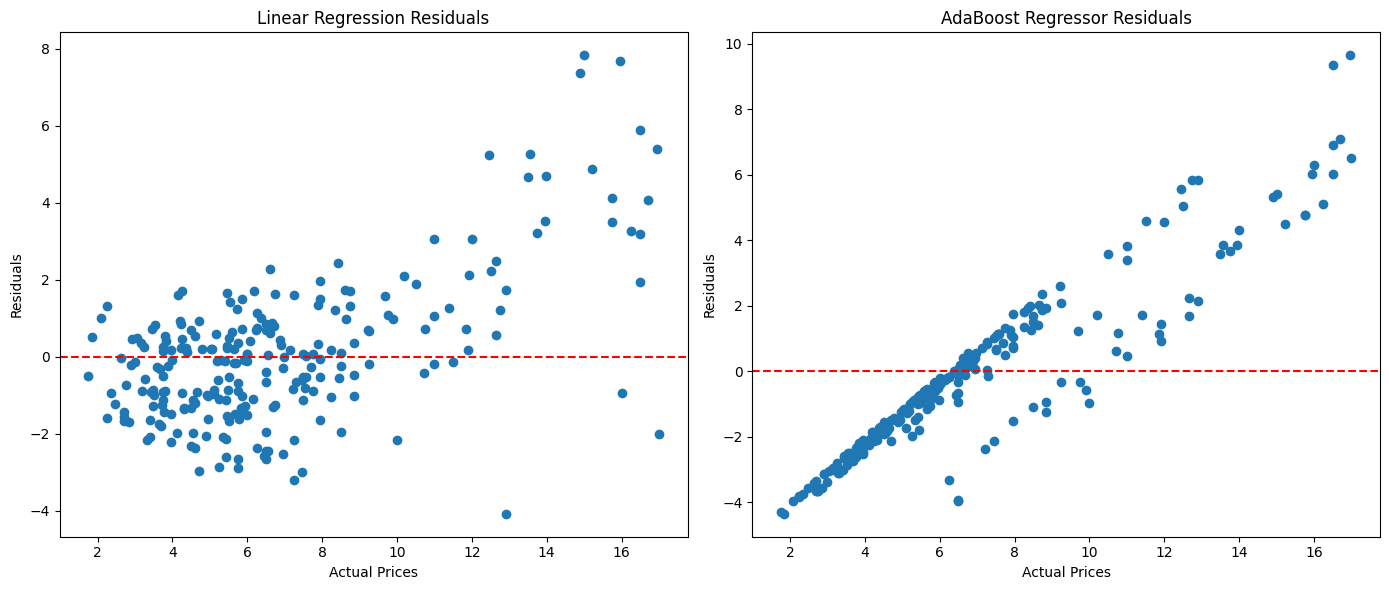

In [66]:
# Visualizations
# Residual Plots
residuals_lr = y_test - y_pred_lr
residuals_ada = y_test - y_pred_ada

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, residuals_lr)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('Linear Regression Residuals')

plt.subplot(1, 2, 2)
plt.scatter(y_test, residuals_ada)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Residuals')
plt.title('AdaBoost Regressor Residuals')

plt.tight_layout()
plt.show()

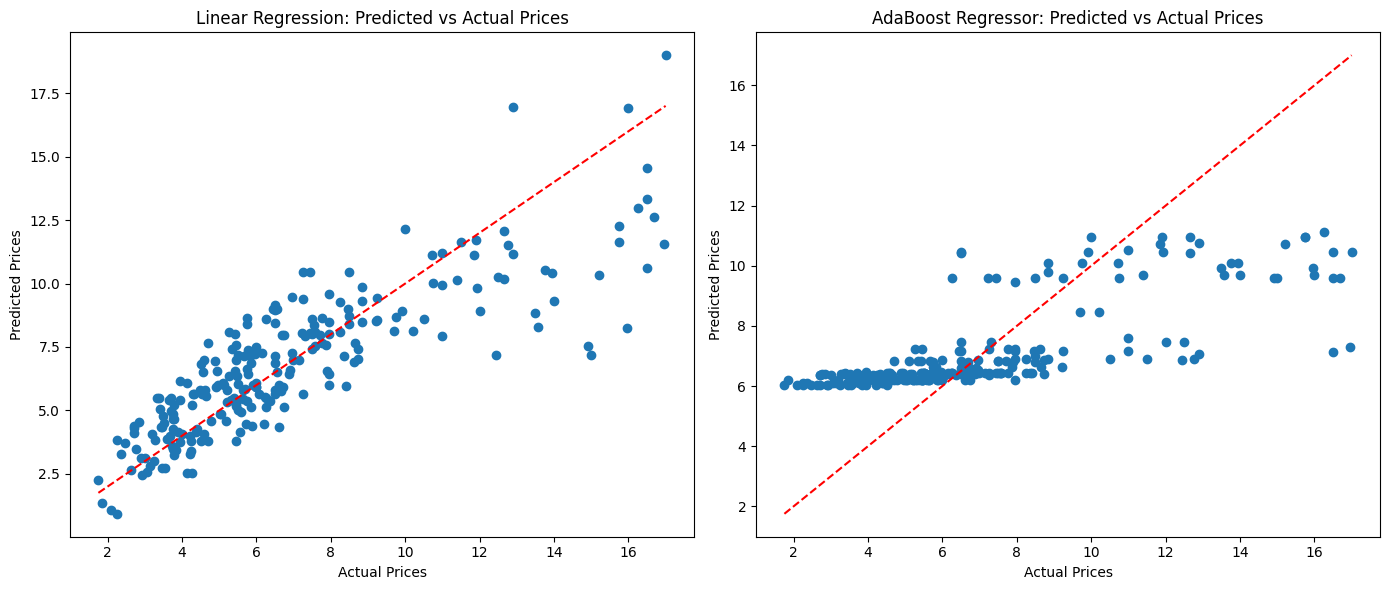

In [67]:
# Predicted vs Actual Prices
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.scatter(y_test, y_pred_lr)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Linear Regression: Predicted vs Actual Prices')

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_pred_ada)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linestyle='--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('AdaBoost Regressor: Predicted vs Actual Prices')

plt.tight_layout()
plt.show()

## Conclusion

This was a fun project, and I learnt a lot from this. 

To Recap, we got the data from Kaggle, and first cleaned the dataset. We explored each col in the dataset to see if there were duplicates, or if there were any corrupted values/rows. We then checked for collinearity and found out that a couple of rows were perfectly collinear, making them redundant. We then got to feature engineering for both the models that we chose, and fit the data (with the selected features) to both models and evaluated it.

We chose the evaluation metrics of MAE, MSE, RMSE and R2, instead of metrics like accuracy for the simple reason


### Key Takeaways
- Importance of Metric Selection for model evaluation

    For our particular scenario, MAE, MSE, RMSE, and R2 are crucial for evaluating our models. They provide detailed insights into the prediction accuracy and model fit, which accuracy cannot. This is because this is a regression problem and not a classification problem. In a classification problem, using Accuracy for model evaluation might have been the way to go. Because when it comes to regression, we are more interested in how close we are to the answer rather than if we are exactly correct
        For ex: If we buy a car for $15,000, but our model predicts $14,800, Accuracy will take a hit, but in reality this is a very good estimate. We are more interested in how close we are to the actual answer rather than whether we predict the exact price

- Importance of Feature Engineering

    We used RFECV as the method for Feature Engineering. This method worked well for the Linear Regression. But it did not work so well for the AdaBoost Regressor, as evidenced by the number of features selected. It is clear that, even within the same dataset, for different models, we might require different methods of selecting features, in order to optimize the model, making it better and making it efficient.

### What did not work
- As mentioned earlier, the feature engineering is a big let down, for the adaBoost Regressor. Maybe with a different feature engineering method, we might have had a better AdaBoost Regressor model.

### Next Steps

There is clearly room for improvement in the model training area. More so with the AdaBoost Regressor. The linear regression, although could be made better, sits pretty, having an R2 value of 0.708, which is a good starting point.

#### Ways to Improve
Here is how we can potentially improve the AdaBoost Regressor.
- Feature Engineering: We can see that the number of features selected is just 4, when we used RFECV. We can potentially try to using a different method for selecting the features.
- Hyperparameters: In this notebook, we did not use any hyperparameter tuning. Incorporating this might help make this model better.

